# Importing Libraries

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
import json
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
!pip install folium --upgrade
import folium.plugins # The Folium Javascript Map Library
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_curve
import statsmodels.api as stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Research Proposal Summary
## Research Question 
How does police officer resources (funding and police training) correlate with the excessive use of force?

## Datasets
[Washington Post’s Fatal Force Dataset, V2](https://github.com/washingtonpost/data-police-shootings)

[Law Enforcement Management and Administrative Statistics (LEMAS), 2020](https://www.icpsr.umich.edu/web/NACJD/studies/38651/variables)

## Academic Publications Regarding the Topic
[Defunding Police — An exploratory data analysis](https://nbandhi.medium.com/defunding-police-an-exploratory-data-analysis-5afafe0df851 )

[The Effect of Field Training Officers on Police Use of
Force](https://static1.squarespace.com/static/5574b6c0e4b0793b94a3401d/t/61d642132ebcc62a368fb9e2/1641431572103/sloan-ross_fto-training.pdf)



## Brief description of the question

Our new question is whether there is a correlation between police officer training and the use of excessive force. Our data source will be a dataset that was published the Washington Post. 

Our outcome variable is going to be shootings per 100000 people per department (unit of analysis). The predictor variables will be academy training hours (unit being in hours), field training hours (unit being in hours), budget (unit in USD), and racial makeup of the department (in percentages). The timeline is 2016 to 2021.

## Brief description of each dataset

We have two datasets.


The first dataset also stems from the Washington Post and provides data on how many shootings occured in which department. 3214 entries and 5 columns. Each row corresponds to one department. It is extremely useful becase it gets rid of the afformentioned downside of the first dataset when linked to it, namely the department associated with incidents. The downside is that it does not contain much other useful information outside of the department and amount of shootings per department.

The second dataset comes from the Bureau of Justice Statistics. Said statistic have been conducted from 1987 through 2020. The original dataset contains an extraordinarily large amount of columns but we decided ro focus on 5 of these columns. In terms of rows, it contains 3499 rows. Since we purposely only chose these five columns, all of them are important. ("ORI7", "ACAD_HRS_ADD", "FLD_HRS_ADD", "OPBUDGET_2019", "RES_POP","PRIMARYPOP2020"). ORI allows us to merge. Population is crucial in order to create a shootings per 100,000 people column. The other columns are predictor variables. The datset is extremely useful because it contains so many different columns that we could use for our regression. The main weakness is that it sometimes does not contain values for certain rows.

ACAD_HRS_ADD stands for voluntary additional academy training hours for new sworn officer/deputy recruits. 

FLD_HRS_ADD stands for voluntary additional field training hours for new sworn officer/deputy recruits. 

ACAD_HRS_ADD stands for state mandated academy training hours for new sworn officer/deputy recruits. 

FLD_HRS_ADD stands for state mandates field training hours for new sworn officer/deputy recruits. 

Having field and academy hours seperated will allow us to check whether either of those have a larger impact than the other. Moreover, the split between mandated hours and voluntarily added hours will enable us to see whether either of those two have an outsized effect.

# I. EDA

## Summary of cleaning steps before generating summary statistics

We will first inspect the data in a general sense, e.g. how many columns, rows, etc.. Thereafter, we will merge the data and make sure that we still have columns that make sense in terms of their names and the data that they contain. On top of that, we will make sure that we do not have missing or wrong data. If we have that then we will either delete those rows or fill in the data. Lastly, we need to make sure that the data in each column is formatted in the right type. Lastly, we will also check whether there are duplicate values and delete hose if neccessary.

## Importing Data

In [ ]:
url2 = "https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master//v2/fatal-police-shootings-agencies.csv"
ps2 = pd.read_csv(url2, index_col=0)


In [ ]:
ps2.info()
ps2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 3145 to 75
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             3233 non-null   object
 1   type             3221 non-null   object
 2   state            3233 non-null   object
 3   oricodes         3136 non-null   object
 4   total_shootings  3233 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 151.5+ KB


,name,type,state,oricodes,total_shootings
id,,,,,
3145,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1
2576,Aberdeen Police Department,local_police,WA,WA01401,1
2114,Abilene Police Department,local_police,TX,TX22101,3
2088,Abington Township Police Department,local_police,PA,PA04601,1
3187,Acadia Parish Sheriff's Office,sheriff,LA,LA00100,1


In [ ]:
url = "https://raw.githubusercontent.com/bellamza/LGST123_Project/main/38651-0001-Data.tsv"
data = pd.read_csv(url,sep='\t')
data = data[["ORI7", "ACAD_HRS_ADD", "FLD_HRS_ADD", "OPBUDGET_2019", "RES_POP","PRIMARYPOP2020", "FLD_HRS_ST", "ACAD_HRS_ST"]]
data

,ORI7,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,RES_POP,PRIMARYPOP2020,FLD_HRS_ST,ACAD_HRS_ST
0,-9,800,960,1.997737e+09,-8,-8,0,618
1,-1,625,480,2.039705e+08,-8,-8,0,408
2,-1,240,0,1.000000e+08,-8,-8,480,520
3,-9,0,0,1.626593e+08,-8,-8,320,480
4,AKASP00,350,560,1.520544e+08,-8,-8,40,650
...,...,...,...,...,...,...,...,...
3494,WV05400,16,488,5.794743e+06,53497,41041,0,850
3495,WY00900,0,-9,4.000000e+05,2500,1655,250,530
3496,WY01000,0,0,2.500000e+06,8445,3929,120,480
3497,WY01300,40,0,1.591135e+07,14581,14841,576,605


In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ORI7            3499 non-null   object 
 1   ACAD_HRS_ADD    3499 non-null   int64  
 2   FLD_HRS_ADD     3499 non-null   int64  
 3   OPBUDGET_2019   3499 non-null   float64
 4   RES_POP         3499 non-null   int64  
 5   PRIMARYPOP2020  3499 non-null   int64  
 6   FLD_HRS_ST      3499 non-null   int64  
 7   ACAD_HRS_ST     3499 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 218.8+ KB


## Getting to Know Our Data

1. [Washington Post’s Fatal Force Datasets, V2](https://github.com/washingtonpost/data-police-shootings)

- This data is generated from The Washington Post. 
- This data has been generated since Jan. 1, 2015, and its creation was sparked by the killing in 2014 of Michael Brown in Ferguson, Mo. The data is updated constantly.
- The purpose of this data is to record instances of fatal force since the data generated by federal officials regarding federal force is lacking, with The Washington Post documenting twice more fatal shootings by police than federal official recordings on average anually. 
- This data is collected by data collectors who search for articles involving instances of fatal police shootings, which are backed by 2 more credible sources, and the data entries and legitimacy are then checked by an editor before being officially added to the dataset. 
- This data has lots of information about each incident including the exact location (lat, long) of where the incident occured, which will be useful when mapping. 
- Since these incidents are manually entered, we must be aware that it is entirely possible that some incidents never get recorded. We must also note that some incidents are not given media coverage. We must consider larger, socioeconomic barriers and biases that give people of privilege more likelyhood of media coverage. 



2. [Law Enforcement Management and Administrative Statistics (LEMAS), 2020](https://www.icpsr.umich.edu/web/NACJD/studies/38651/variables)
- The LEMAS is an offical government survey conducted by the Bureau of Justice Statistics.
- The LEMAS has been conducted since 1987 through 2020. It gets conducted every 3-4 years. 
- The purpose of this data is to collect information on law enforcement agencies and hold them to a higher level of accountability and transparency. 
- One benefit of this data is that it is information directly from law enforcement agencies, which may likely led to more accurate information, however for the same reason, we might be wary of underreporting. 

## Merging Data

In [ ]:
ultimate_data_set = ps2
ultimate_data_set = ultimate_data_set.merge(data, right_on = "ORI7", left_on = "oricodes")
ultimate_data_set

,name,type,state,oricodes,total_shootings,ORI7,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,RES_POP,PRIMARYPOP2020,FLD_HRS_ST,ACAD_HRS_ST
0,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1,SC00100,0,360,2000000.0,25000,15822,0,480
1,Aberdeen Police Department,local_police,WA,WA01401,1,WA01401,0,44,6799803.0,-8,16827,528,720
2,Abilene Police Department,local_police,TX,TX22101,3,TX22101,372,560,30362070.0,-8,124407,0,728
3,Ada County Sheriff's Office,sheriff,ID,ID00100,3,ID00100,-9,-9,-9.0,-9,131521,-9,-9
4,Adams County Sheriff's Department,sheriff,CO,CO00100,12,CO00100,110,0,32120833.0,97633,100053,24,746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Yonkers Police Department,local_police,NY,NY05907,1,NY05907,0,0,105296716.0,-8,200040,160,700
1234,York County Sheriff's Office,sheriff,SC,SC04600,2,SC04600,0,800,36759699.0,165000,160725,0,480
1235,York Police Department,local_police,PA,PA06702,1,PA06702,0,640,21357458.0,-8,43907,160,919
1236,Young County Sheriff's Department,NaN,TX,TX25200,1,TX25200,-9,-9,-9.0,-9,6262,-9,-9


## Data Dimensions

In [ ]:
ultimate_data_set.shape

(1238, 13)

## Data Exploration

- Looking at distributions to see how interesting variables are (this will include some visualizations)
- Getting sense of data by looking at stats

In [ ]:
#Broadly examining the data 
ultimate_data_set.info()
ultimate_data_set.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1238 non-null   object 
 1   type             1235 non-null   object 
 2   state            1238 non-null   object 
 3   oricodes         1238 non-null   object 
 4   total_shootings  1238 non-null   int64  
 5   ORI7             1238 non-null   object 
 6   ACAD_HRS_ADD     1238 non-null   int64  
 7   FLD_HRS_ADD      1238 non-null   int64  
 8   OPBUDGET_2019    1238 non-null   float64
 9   RES_POP          1238 non-null   int64  
 10  PRIMARYPOP2020   1238 non-null   int64  
 11  FLD_HRS_ST       1238 non-null   int64  
 12  ACAD_HRS_ST      1238 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 135.4+ KB


,name,type,state,oricodes,total_shootings,ORI7,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,RES_POP,PRIMARYPOP2020,FLD_HRS_ST,ACAD_HRS_ST
0,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1,SC00100,0,360,2000000.0,25000,15822,0,480
1,Aberdeen Police Department,local_police,WA,WA01401,1,WA01401,0,44,6799803.0,-8,16827,528,720
2,Abilene Police Department,local_police,TX,TX22101,3,TX22101,372,560,30362070.0,-8,124407,0,728
3,Ada County Sheriff's Office,sheriff,ID,ID00100,3,ID00100,-9,-9,-9.0,-9,131521,-9,-9
4,Adams County Sheriff's Department,sheriff,CO,CO00100,12,CO00100,110,0,32120833.0,97633,100053,24,746


## Feature Engineering: Total Training Hours

In [ ]:
ultimate_data_set["FLD_HRS_TOT"] = ultimate_data_set["FLD_HRS_ADD"] + ultimate_data_set["FLD_HRS_ST"]
ultimate_data_set["ACAD_HRS_TOT"] = ultimate_data_set["ACAD_HRS_ADD"] + ultimate_data_set["ACAD_HRS_ST"]
ultimate_data_set

,name,type,state,oricodes,total_shootings,ORI7,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,RES_POP,PRIMARYPOP2020,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT
0,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1,SC00100,0,360,2000000.0,25000,15822,0,480,360,480
1,Aberdeen Police Department,local_police,WA,WA01401,1,WA01401,0,44,6799803.0,-8,16827,528,720,572,720
2,Abilene Police Department,local_police,TX,TX22101,3,TX22101,372,560,30362070.0,-8,124407,0,728,560,1100
3,Ada County Sheriff's Office,sheriff,ID,ID00100,3,ID00100,-9,-9,-9.0,-9,131521,-9,-9,-18,-18
4,Adams County Sheriff's Department,sheriff,CO,CO00100,12,CO00100,110,0,32120833.0,97633,100053,24,746,24,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Yonkers Police Department,local_police,NY,NY05907,1,NY05907,0,0,105296716.0,-8,200040,160,700,160,700
1234,York County Sheriff's Office,sheriff,SC,SC04600,2,SC04600,0,800,36759699.0,165000,160725,0,480,800,480
1235,York Police Department,local_police,PA,PA06702,1,PA06702,0,640,21357458.0,-8,43907,160,919,800,919
1236,Young County Sheriff's Department,NaN,TX,TX25200,1,TX25200,-9,-9,-9.0,-9,6262,-9,-9,-18,-18


## Feature Engineering: Shootings per capita

We want to normalize number of shootings to account for vast differences in population sizes.
First step is getting population counts for each agency.

Some of the values for RES_POP are -8 and -9, code for missing values. Only sheriff agencies have non-negatve RES_POP values. To assign populations for the agencies with negative RES_POP values, we will be using PRIMARYPOP2020 in place of negative values. Basically, if there is a negative RES_POP, we will use PRIMARYPOP2020 as a population count for the agency instead.

In [ ]:
pop = []
for index, row in ultimate_data_set.iterrows():
  if ultimate_data_set['RES_POP'][index] < 0:
    pop.append(ultimate_data_set['PRIMARYPOP2020'][index])
  else:
    pop.append(ultimate_data_set['RES_POP'][index])
ultimate_data_set['POPULATION'] = pop

In [ ]:
len(ultimate_data_set[ultimate_data_set['POPULATION']<0])

20

There are still 15 rows with negative population counts, menaing that RES_POP and PRIMARYPOP2020 were both negative values. Since there are only 15 rows, we decide to drop these rows from the table, filtering by only rows with POPULATION > 0.

In [ ]:
ultimate_data_set = ultimate_data_set[ultimate_data_set['POPULATION']>0]
ultimate_data_set = ultimate_data_set.drop(["RES_POP", "PRIMARYPOP2020"], axis=1)

Now that we have positive population counts for each agency, we can normalize the number of shootings to account for different population sizes. We choose to represent shootings as shootings per capita, showing how many shooting occur per 100k people.

In [ ]:
ultimate_data_set["shootings_per_100k"] = ultimate_data_set["total_shootings"] /(ultimate_data_set['POPULATION']/100000)
ultimate_data_set

,name,type,state,oricodes,total_shootings,ORI7,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT,POPULATION,shootings_per_100k
0,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1,SC00100,0,360,2000000.0,0,480,360,480,25000,4.000000
1,Aberdeen Police Department,local_police,WA,WA01401,1,WA01401,0,44,6799803.0,528,720,572,720,16827,5.942830
2,Abilene Police Department,local_police,TX,TX22101,3,TX22101,372,560,30362070.0,0,728,560,1100,124407,2.411440
3,Ada County Sheriff's Office,sheriff,ID,ID00100,3,ID00100,-9,-9,-9.0,-9,-9,-18,-18,131521,2.281005
4,Adams County Sheriff's Department,sheriff,CO,CO00100,12,CO00100,110,0,32120833.0,24,746,24,856,97633,12.290926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Yonkers Police Department,local_police,NY,NY05907,1,NY05907,0,0,105296716.0,160,700,160,700,200040,0.499900
1234,York County Sheriff's Office,sheriff,SC,SC04600,2,SC04600,0,800,36759699.0,0,480,800,480,165000,1.212121
1235,York Police Department,local_police,PA,PA06702,1,PA06702,0,640,21357458.0,160,919,800,919,43907,2.277541
1236,Young County Sheriff's Department,NaN,TX,TX25200,1,TX25200,-9,-9,-9.0,-9,-9,-18,-18,6262,15.969339


## Feature Engineering: Budget per capita

In [ ]:
ultimate_data_set["budget_per_100k"] = ultimate_data_set["OPBUDGET_2019"] /(ultimate_data_set['POPULATION']/100000)
ultimate_data_set

,name,type,state,oricodes,total_shootings,ORI7,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT,POPULATION,shootings_per_100k,budget_per_100k
0,Abbeville County Sheriff's Office,sheriff,SC,SC00100,1,SC00100,0,360,2000000.0,0,480,360,480,25000,4.000000,8.000000e+06
1,Aberdeen Police Department,local_police,WA,WA01401,1,WA01401,0,44,6799803.0,528,720,572,720,16827,5.942830,4.041007e+07
2,Abilene Police Department,local_police,TX,TX22101,3,TX22101,372,560,30362070.0,0,728,560,1100,124407,2.411440,2.440544e+07
3,Ada County Sheriff's Office,sheriff,ID,ID00100,3,ID00100,-9,-9,-9.0,-9,-9,-18,-18,131521,2.281005,-6.843014e+00
4,Adams County Sheriff's Department,sheriff,CO,CO00100,12,CO00100,110,0,32120833.0,24,746,24,856,97633,12.290926,3.289957e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,Yonkers Police Department,local_police,NY,NY05907,1,NY05907,0,0,105296716.0,160,700,160,700,200040,0.499900,5.263783e+07
1234,York County Sheriff's Office,sheriff,SC,SC04600,2,SC04600,0,800,36759699.0,0,480,800,480,165000,1.212121,2.227861e+07
1235,York Police Department,local_police,PA,PA06702,1,PA06702,0,640,21357458.0,160,919,800,919,43907,2.277541,4.864249e+07
1236,Young County Sheriff's Department,NaN,TX,TX25200,1,TX25200,-9,-9,-9.0,-9,-9,-18,-18,6262,15.969339,-1.437240e+02


In [ ]:
len(ultimate_data_set[ultimate_data_set.duplicated()]) == 0

True

This dataset has no duplicate values since the length of the duplicates is 0. Hence, we do not need to worry about this aspect anymore. 

## Data Overview

In the following we aim to get some insights into the general values of each column before creating some graphs

In [ ]:
#Broadly examining the data 
ultimate_data_set.describe()

,total_shootings,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT,POPULATION,shootings_per_100k,budget_per_100k
count,1214.000000,1214.000000,1214.000000,1.214000e+03,1214.000000,1214.000000,1214.000000,1214.000000,1.214000e+03,1214.000000,1.214000e+03
mean,4.548600,87.494234,235.349259,5.755438e+07,197.327842,522.126853,432.677100,609.621087,1.782912e+05,6.239996,2.640649e+07
std,8.646327,171.149456,293.422831,2.313716e+08,268.777099,311.429164,315.681345,377.067421,4.679531e+05,13.573469,2.998831e+07
min,1.000000,-9.000000,-9.000000,-9.000000e+00,-9.000000,-9.000000,-18.000000,-18.000000,4.110000e+02,0.052114,-2.189781e+03
25%,1.000000,0.000000,0.000000,2.116109e+06,0.000000,413.250000,120.000000,462.250000,3.612675e+04,1.815171,1.167028e+07
50%,2.000000,0.000000,40.000000,1.777822e+07,0.000000,594.000000,500.000000,664.000000,8.322100e+04,3.234758,2.390322e+07
75%,4.000000,98.500000,500.000000,4.410791e+07,416.250000,720.000000,640.000000,880.000000,1.631622e+05,5.999610,3.425699e+07
max,122.000000,1022.000000,2080.000000,6.000000e+09,2000.000000,1500.000000,2560.000000,1720.000000,1.044108e+07,247.218789,6.032382e+08


## Include count/percentage of missing observations
Some of these columns have -9 as their values, which is mot likely a filler value and, hence, need to be dealt with. Additionally, some columns have some unrealistically large values, which we need to assess. Firstly, we need to assess how many rows with -9 values there are and delete those if it is not too many.

In [ ]:
len(ultimate_data_set[ultimate_data_set["ACAD_HRS_ADD"] < 0 ])

247

In [ ]:
len(ultimate_data_set[ultimate_data_set["ACAD_HRS_ADD"] == -9 ])

247

In [ ]:
len(ultimate_data_set[ultimate_data_set["FLD_HRS_ADD"] < 0 ])

244

In [ ]:
len(ultimate_data_set[ultimate_data_set["FLD_HRS_ADD"] == -9 ])

244

In [ ]:
len(ultimate_data_set[ultimate_data_set["OPBUDGET_2019"] == -9 ])

227

In [ ]:
len(ultimate_data_set[ultimate_data_set["OPBUDGET_2019"] < 0 ])

227

In [ ]:
len(ultimate_data_set[ultimate_data_set["ACAD_HRS_ADD"] < 0 ])/len(ultimate_data_set)

0.20345963756177923

We first checked that all values below 0 are the ones that are -9, which is the case. This, in turn, proves that all of these are basially just rows with missing data. Deleting all the rows with missing observations would end up reducing the size of dataset by 20%. We think that this is ok considering the generally large size of the dataset and will hence delete these rows.  

In [ ]:
# Before doing so we will inspect the rows that we are about to drop in order to see whether there are some significant differences among them compared to the whole data set that might skew our results
to_be_deleted_rows = ultimate_data_set[ultimate_data_set["ACAD_HRS_ADD"] < 0]
to_be_deleted_rows.describe()

,total_shootings,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT,POPULATION,shootings_per_100k,budget_per_100k
count,247.000000,247.0,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,2.470000e+02,247.000000,2.470000e+02
mean,2.910931,-9.0,1.801619,3.368907e+06,12.765182,31.429150,14.566802,22.429150,9.746286e+04,8.168951,2.744091e+06
std,3.783813,0.0,69.975701,1.636422e+07,112.512265,155.313851,132.247868,155.313851,1.371271e+05,18.809145,8.951429e+06
min,1.000000,-9.0,-9.000000,-9.000000e+00,-9.000000,-9.000000,-18.000000,-18.000000,4.110000e+02,0.289674,-2.189781e+03
25%,1.000000,-9.0,-9.000000,-9.000000e+00,-9.000000,-9.000000,-18.000000,-18.000000,2.224950e+04,2.012631,-3.732659e+01
50%,2.000000,-9.0,-9.000000,-9.000000e+00,-9.000000,-9.000000,-18.000000,-18.000000,5.484100e+04,4.085847,-1.525682e+01
75%,3.000000,-9.0,-9.000000,-9.000000e+00,-9.000000,-9.000000,-18.000000,-18.000000,1.041675e+05,7.207301,-6.263337e+00
max,32.000000,-9.0,600.000000,1.926373e+08,808.000000,800.000000,799.000000,791.000000,1.072435e+06,243.309002,5.718342e+07


In [ ]:
ultimate_data_set.describe()

,total_shootings,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT,POPULATION,shootings_per_100k,budget_per_100k
count,1214.000000,1214.000000,1214.000000,1.214000e+03,1214.000000,1214.000000,1214.000000,1214.000000,1.214000e+03,1214.000000,1.214000e+03
mean,4.548600,87.494234,235.349259,5.755438e+07,197.327842,522.126853,432.677100,609.621087,1.782912e+05,6.239996,2.640649e+07
std,8.646327,171.149456,293.422831,2.313716e+08,268.777099,311.429164,315.681345,377.067421,4.679531e+05,13.573469,2.998831e+07
min,1.000000,-9.000000,-9.000000,-9.000000e+00,-9.000000,-9.000000,-18.000000,-18.000000,4.110000e+02,0.052114,-2.189781e+03
25%,1.000000,0.000000,0.000000,2.116109e+06,0.000000,413.250000,120.000000,462.250000,3.612675e+04,1.815171,1.167028e+07
50%,2.000000,0.000000,40.000000,1.777822e+07,0.000000,594.000000,500.000000,664.000000,8.322100e+04,3.234758,2.390322e+07
75%,4.000000,98.500000,500.000000,4.410791e+07,416.250000,720.000000,640.000000,880.000000,1.631622e+05,5.999610,3.425699e+07
max,122.000000,1022.000000,2080.000000,6.000000e+09,2000.000000,1500.000000,2560.000000,1720.000000,1.044108e+07,247.218789,6.032382e+08


In [ ]:
np.mean(ultimate_data_set["budget_per_100k"])/np.mean(to_be_deleted_rows["budget_per_100k"])

9.623034612695237

When comparing these datasets, we cannot detect significant differences. The 
mean of the population is generally very similar. The mean shootings per 100k are roughly 30% higher but that does not constitute a significant difference fore us. 

In [ ]:
len(ultimate_data_set)

1214

In [ ]:
ultimate_data_set = ultimate_data_set[ultimate_data_set["ACAD_HRS_ADD"] >= 0 ]

In [ ]:
len(ultimate_data_set)

967

In [ ]:
ultimate_data_set = ultimate_data_set[ultimate_data_set["FLD_HRS_ADD"] >= 0 ]

In [ ]:
len(ultimate_data_set)

963

In [ ]:
ultimate_data_set = ultimate_data_set[ultimate_data_set["OPBUDGET_2019"] >= 0 ]

In [ ]:
len(ultimate_data_set)

956

In [ ]:
ultimate_data_set = ultimate_data_set[ultimate_data_set["FLD_HRS_ST"] >= 0 ]

In [ ]:
ultimate_data_set = ultimate_data_set[ultimate_data_set["ACAD_HRS_ST"] >= 0 ]

In [ ]:
len(ultimate_data_set)

952

Thankfully after testing it turns out that the missing values are in the same rows for these columns as seen by the number of rows not dropping anymore after dropping the rows with missing values for the "ACAD_HRS_ADD" column. (We only lose 4 columns by also deleting FLD_HRS_ST and ACAD_HRS_ST with values below 0 

In [ ]:
ultimate_data_set.describe()

,total_shootings,ACAD_HRS_ADD,FLD_HRS_ADD,OPBUDGET_2019,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT,POPULATION,shootings_per_100k,budget_per_100k
count,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,9.520000e+02
mean,5.013655,112.406513,297.173319,7.235157e+07,244.691176,649.194328,541.864496,761.600840,2.009322e+05,5.723604,3.271039e+07
std,9.517863,184.306104,299.535631,2.592114e+08,275.623742,195.294001,252.678633,247.909829,5.214549e+05,11.882911,3.052566e+07
min,1.000000,0.000000,0.000000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.052114,1.466850e+06
25%,1.000000,0.000000,0.000000,9.580429e+06,0.000000,533.750000,440.000000,585.000000,4.057875e+04,1.673425,1.947619e+07
50%,2.000000,0.000000,240.000000,2.452952e+07,120.000000,643.000000,560.000000,729.000000,9.393400e+04,3.107224,2.732834e+07
75%,5.000000,188.500000,560.000000,5.681234e+07,480.000000,750.000000,680.000000,920.000000,1.847530e+05,5.662508,3.745115e+07
max,122.000000,1022.000000,2080.000000,6.000000e+09,2000.000000,1500.000000,2560.000000,1720.000000,1.044108e+07,247.218789,6.032382e+08


## Analysis of Data Summary 

Total shootings is generally distributed pretty realistically except for a very large max value. These values probably, however, vary because of the different sizes of populations and do not pose a problem since we will adjst for population. We will not se longitude or latitude so one can ignore these. The age is distribted as expected. ACAD_HRS_ADD has a lot of 0 values. This, however, is natral and shold not pose a problem. There are, however, some very large values that we should expect more closely. The same can be said for FLD_HRS_ADD. OPBUDGET_2019 is distributed pretty realistically. Similar to total_shootings, it contains some very large values, most likely to large departments. Again, this will most likely not present a problem anymore once we adjst for population. FLD_HRS_ST	and ACAD_HRS_ST are distributed a bit more equally than their ADD counterparts. We can also inspect them for outliers but they should be fine. The total nmumbers of academy and field training are also distributed quite uniformly and, hence, we do not see a reason to worry about this. The population varies a decent amount but that is to be expected and natural. In fact, it probably is helpful to balance the large budgets and shootings in some departments that were mentioned earlier. The shootings per 100k is generally well distributed but also has some large outliers. We have to investigate this later. Lastly, the budget per 100k is balanced quite well. 

## Data Visualizations

We will now choose the relevant columns and look at the dsitributions of the data in order to get a sense of the data.

In [ ]:
ultimate_data_set.columns

Index(['name', 'type', 'state', 'oricodes', 'total_shootings', 'ORI7',
       'ACAD_HRS_ADD', 'FLD_HRS_ADD', 'OPBUDGET_2019', 'FLD_HRS_ST',
       'ACAD_HRS_ST', 'FLD_HRS_TOT', 'ACAD_HRS_TOT', 'POPULATION',
       'shootings_per_100k', 'budget_per_100k'],
      dtype='object')

In [ ]:
ultimate_data_set = ultimate_data_set[['ACAD_HRS_ADD', 'FLD_HRS_ADD', 'POPULATION', 'shootings_per_100k',
       'budget_per_100k', 'FLD_HRS_ST', 'ACAD_HRS_ST', 'FLD_HRS_TOT', "OPBUDGET_2019",
       'ACAD_HRS_TOT']]

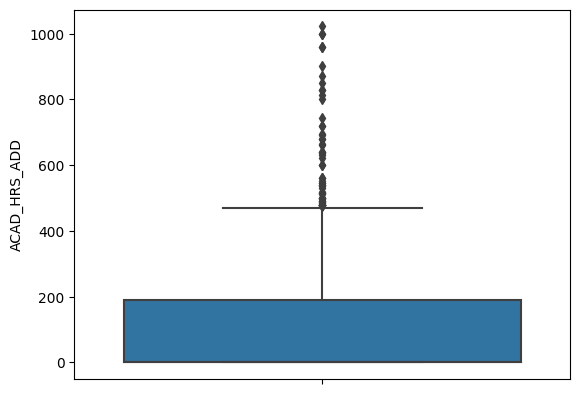

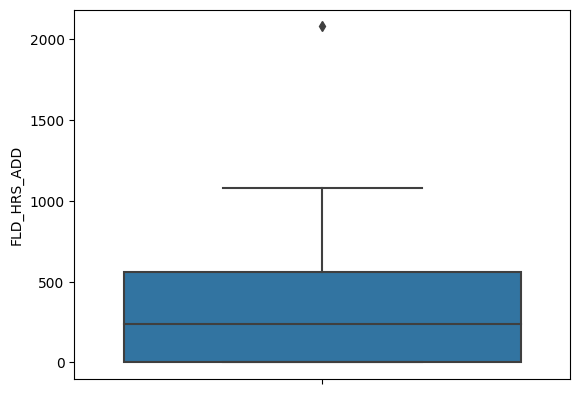

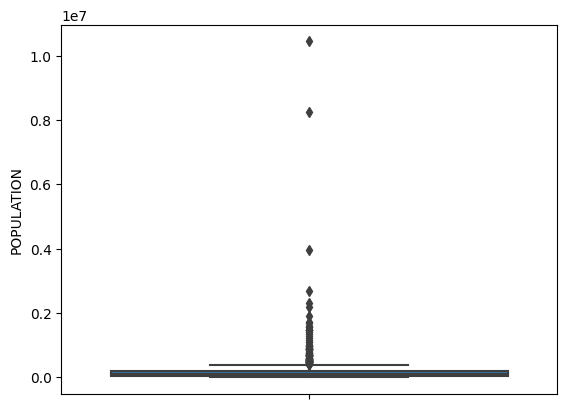

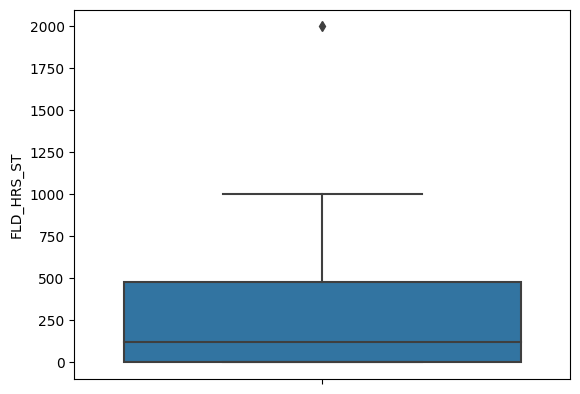

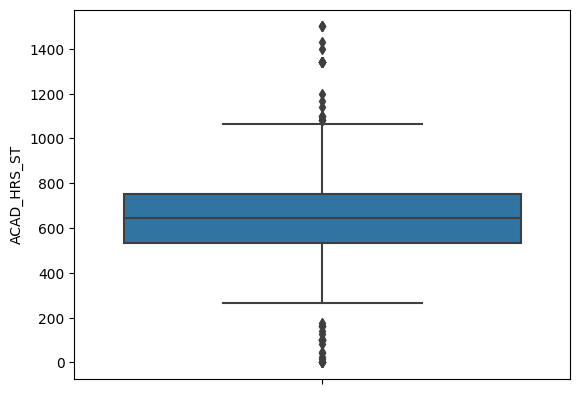

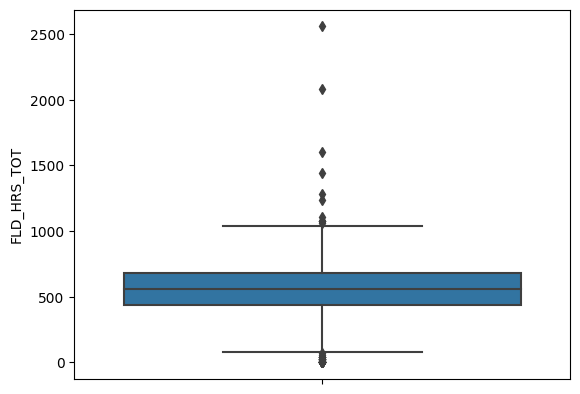

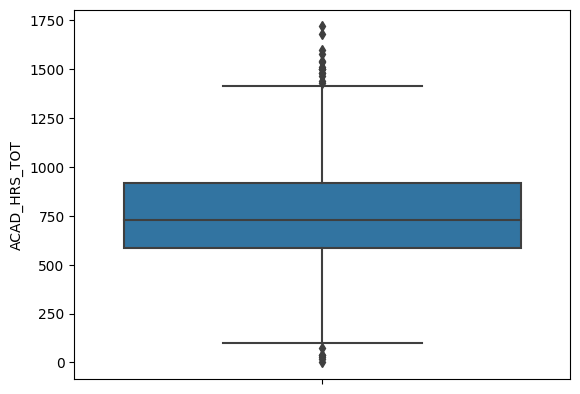

In [ ]:
for col in ultimate_data_set.select_dtypes(include='int').columns:
        fig = sns.boxplot(y=col, data=ultimate_data_set)
        plt.show()

The total shootings has some pretty large outliers but the fact that are multiple outliers along the way indicates that this is natural and not a data mistake. Hence, this is not something to worry about. ACAD_HRS_ADD has a pretty equal dsitribution, again indicating that we do not need to worry about statistical outliers. Same goes for ACAD_HRS_ST and ACAD_HRS_TOT. FLD_HRS_ADD appears to have one very large statistical outlier that we should inspect  but is fine outside of that. FLD_HRS_ST has the exact same issue. These issues can also somewhta be seen in FLD_HRS_TOT although there are data points along the way, which indicates that these outliers might not be as much of a problem as thoguht initially. The population has some pretty large outliers but that is not really an issue since that is just natural. 

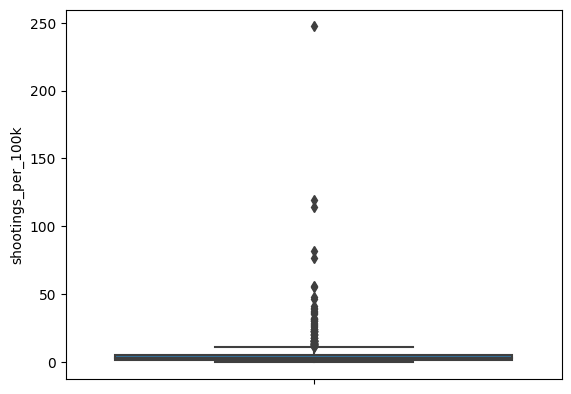

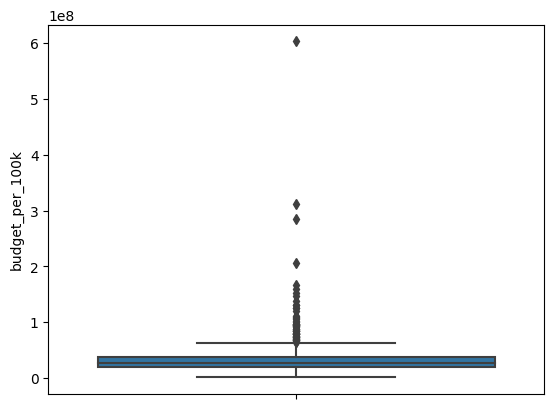

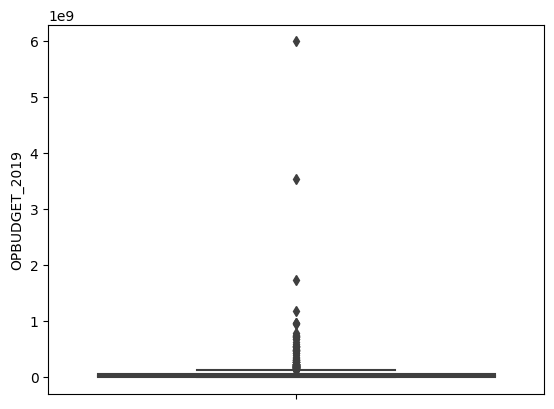

In [ ]:
for col in ultimate_data_set.select_dtypes(include='float').columns:
        fig = sns.boxplot(y=col, data=ultimate_data_set)
        plt.show()

In [ ]:
ultimate_data_set["FLD_HRS_ADD"].sort_values(ascending=False).head(50) 

647     2080
143     1080
213     1040
614      960
646      960
722      960
397      944
9        823
80       801
611      800
1016     800
609      800
642      800
210      800
604      800
1058     800
1059     800
74       800
75       800
650      800
710      800
639      800
791      800
754      800
594      800
864      800
859      800
880      800
852      800
109      800
849      800
831      800
102      800
914      800
807      800
797      800
769      800
933      800
945      800
952      800
760      800
1043     800
866      800
1172     800
441      800
247      800
1153     800
1135     800
592      800
268      800
Name: FLD_HRS_ADD, dtype: int64

Although both columns contain some values that are quite high compared to the mean, these outliers are not that diverging enough to assume that there are any errors in the data. Hence, we decided to not remove any of them. 

In [ ]:
ultimate_data_set["budget_per_100k"].sort_values(ascending=False).head(50) 

1033    6.032382e+08
1155    3.121633e+08
753     2.852782e+08
193     2.065233e+08
983     1.662015e+08
126     1.604083e+08
397     1.525138e+08
1019    1.479682e+08
405     1.385890e+08
707     1.312883e+08
801     1.306251e+08
874     1.257679e+08
254     1.252231e+08
342     1.201200e+08
1182    1.119348e+08
764     1.091238e+08
825     1.076896e+08
971     1.052780e+08
846     1.024221e+08
985     1.007432e+08
743     9.736944e+07
1145    9.735092e+07
147     9.641295e+07
1005    9.588113e+07
242     9.531864e+07
880     9.447532e+07
958     9.371641e+07
757     9.345591e+07
62      9.151136e+07
113     8.834448e+07
11      8.760541e+07
309     8.666667e+07
523     8.534588e+07
1217    8.502194e+07
418     8.375744e+07
768     8.085380e+07
1084    8.058956e+07
977     7.988894e+07
918     7.877755e+07
878     7.874575e+07
706     7.849528e+07
779     7.576940e+07
806     7.461506e+07
49      7.400104e+07
9       7.343224e+07
366     7.326078e+07
785     7.269896e+07
1122    7.017

In [ ]:
# We want to investigate the budget outlier in this cell in order to understand how this happens, whether this is realistic, and what we could do to this and other outliers
budget_outlier = ultimate_data_set[ultimate_data_set["budget_per_100k"] > 600000000]
budget_outlier

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,OPBUDGET_2019,ACAD_HRS_TOT
1033,356,160,19862,10.069479,6.032382e+08,400,664,560,119815177.0,1020


The outlier is the Solano County Sheriff office. The row states that the population is only around 20k although Solano county as a whole has a population of around 400k. This discrepency probably explains the extraordinarily high budget_per_100k. Presumably, Solano has multiple offices and the official population is divided somewhat unequally among them. On top of that, it could be that Solano county spends more on the police force since it contains a university (who often need more police force). We looked at a couple more outliers in the following cell in order to get a better understanding of what the source might be.

In [ ]:
budget_outliers = ultimate_data_set[ultimate_data_set["budget_per_100k"] > 100000000]
budget_outliers

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,OPBUDGET_2019,ACAD_HRS_TOT
126,128,552,600244,2.665583,1.604083e+08,40,770,592,962841240.0,898
193,0,80,272979,1.098986,2.065233e+08,800,928,880,563765248.0,928
254,80,800,38471,7.798082,1.252231e+08,0,664,800,48174584.0,744
342,0,688,2500,40.000000,1.201200e+08,0,840,688,3003000.0,840
397,68,944,99801,7.013958,1.525138e+08,60,680,1004,152210268.0,748
405,400,50,175561,3.987218,1.385890e+08,600,668,650,243308215.0,1068
707,313,180,87726,5.699565,1.312883e+08,0,844,180,115174000.0,1157
753,0,0,55820,1.791473,2.852782e+08,640,640,640,159242318.0,640
764,40,0,14581,6.858240,1.091238e+08,576,605,576,15911348.0,645
801,0,0,6346,15.757958,1.306251e+08,560,480,560,8289466.0,480


Many of the outliers are in California. Additionally, many of the population numbers do not reflect the actual population numbers of the counties, probably because there are multiple different departments in the county that split the population. Additionally, many of these counties contain very large universities (UCSD, UCSB, Riverside), which supports the hypothesis that the UC system might systematically spend more on the police force. Since this is a reasonable explanation, we are not worried about the outliers.

In [ ]:
# We will also investigate the outliers in other columns to see whether there might be errors 

opbudget_threshold = ultimate_data_set['OPBUDGET_2019'].quantile(0.98)
fld_hrs_tot_threshold = ultimate_data_set['FLD_HRS_TOT'].quantile(0.98)
acad_hrs_tot_threshold = ultimate_data_set['ACAD_HRS_TOT'].quantile(0.98)
shootings_per_100k_threshold = ultimate_data_set['shootings_per_100k'].quantile(0.98)

top_opbudget = ultimate_data_set[ultimate_data_set['OPBUDGET_2019'] >= opbudget_threshold]
top_fld_hrs_tot = ultimate_data_set[ultimate_data_set['FLD_HRS_TOT'] >= fld_hrs_tot_threshold]
top_acad_hrs_tot = ultimate_data_set[ultimate_data_set['ACAD_HRS_TOT'] >= acad_hrs_tot_threshold]
top_shootings_per_100k = ultimate_data_set[ultimate_data_set['shootings_per_100k'] >= shootings_per_100k_threshold]


top_opbudget

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,OPBUDGET_2019,ACAD_HRS_TOT
126,128,552,600244,2.665583,1.604083e+08,40,770,592,9.628412e+08,898
190,0,540,2677643,1.829968,4.443269e+07,0,560,540,1.189749e+09,560
193,0,80,272979,1.098986,2.065233e+08,800,928,880,5.637652e+08,928
515,409,440,2316120,3.022296,4.081963e+07,80,696,520,9.454316e+08,1105
614,560,960,1689845,3.787330,3.739779e+07,0,480,960,6.319647e+08,1040
646,216,960,10441080,0.957755,3.398890e+07,0,664,960,3.548808e+09,880
647,0,2080,3970219,3.072878,4.367110e+07,0,912,2080,1.733838e+09,912
706,0,0,712816,2.525196,7.849528e+07,560,890,560,5.595269e+08,890
708,640,680,1278492,3.441555,4.628003e+07,0,960,680,5.916865e+08,1600
785,0,0,8253213,0.775456,7.269896e+07,0,860,0,6.000000e+09,860


Unsurprisingly, large cities, which generally tend to have large populations and more crime, also spend more on their police force. This is especially the case for California. Many of the police departments are sheriff departments.

In [ ]:
top_fld_hrs_tot

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,OPBUDGET_2019,ACAD_HRS_TOT
81,340,480,40954,4.883528,4.009724e+07,480,664,960,1.642142e+07,1004
139,0,0,12847,7.783918,1.790301e+07,1000,799,1000,2.300000e+06,799
143,77,1080,203436,0.983110,4.784415e+07,0,496,1080,9.733223e+07,573
213,441,1040,378589,2.113109,5.456228e+07,0,740,1040,2.065668e+08,1181
397,68,944,99801,7.013958,1.525138e+08,60,680,1004,1.522103e+08,748
408,500,680,139921,2.858756,3.415847e+07,400,664,1080,4.779488e+07,1164
614,560,960,1689845,3.787330,3.739779e+07,0,480,960,6.319647e+08,1040
646,216,960,10441080,0.957755,3.398890e+07,0,664,960,3.548808e+09,880
647,0,2080,3970219,3.072878,4.367110e+07,0,912,2080,1.733838e+09,912
709,0,168,109131,1.832660,3.393914e+07,800,788,968,3.703812e+07,788


One can hardly detect trends in this data. Again, there are many California and also many Florida departments listed here. There are significantly more local police departments. This makes sense since the local police probably contains more new officers that need training than a sheriff department.

In [ ]:
top_acad_hrs_tot

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,OPBUDGET_2019,ACAD_HRS_TOT
121,200,40,143525,0.696743,2.796162e+07,400,1340,440,40131912.0,1540
244,690,760,327248,4.278101,2.473156e+07,160,696,920,80933540.0,1386
261,0,0,1343266,1.563354,3.623651e+07,800,1400,800,486752691.0,1400
271,623,24,139907,4.288563,3.799688e+07,0,737,24,53160300.0,1360
332,80,80,27511,10.904729,2.222281e+07,800,1500,880,6113716.0,1580
489,1000,680,329172,3.037925,2.937811e+07,0,480,680,96704504.0,1480
533,0,80,54226,1.844134,2.581787e+07,0,1500,80,14000000.0,1500
579,960,640,130676,6.887263,3.673207e+07,0,720,640,48000000.0,1680
615,742,70,71582,1.396999,3.510199e+07,672,770,742,25126705.0,1512
624,0,160,15000,6.666667,2.129875e+07,0,1431,160,3194812.0,1431


There are again significantly more local police departments. On top of that, Texas seems to have a higher amount of required training hours as many of these departments are from Texas. Texas was almost not represented at all earlier. Presumably, many police departments do not need additional training since there is already a lot of state enforced training. California and Florida are, however, very rare. It seems that these states have a more "open" approach, meaning that they have less state mandated hours and let the departments themselves decide how much they want to train.

In [ ]:
top_shootings_per_100k

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,OPBUDGET_2019,ACAD_HRS_TOT
46,0,180,2396,41.736227,1.559608e+07,0,560,180,373682.0,560
73,40,0,3134,31.908105,1.121886e+07,0,400,0,351599.0,440
78,0,0,809,247.218789,3.996292e+07,80,800,80,323300.0,800
188,0,120,2094,47.755492,2.462455e+07,0,720,120,515638.0,720
250,0,0,1780,56.179775,2.131972e+07,480,720,480,379491.0,720
342,0,688,2500,40.000000,1.201200e+08,0,840,688,3003000.0,840
375,0,0,1300,76.923077,7.692308e+06,0,640,0,100000.0,640
450,0,0,835,119.760479,5.095808e+07,0,25,0,425500.0,25
507,0,0,2830,35.335689,1.503406e+07,675,460,675,425464.0,460
558,0,0,2132,46.904315,1.407129e+07,0,400,0,300000.0,400


These are almost all small countiesw, which probably arises from the fact that even one shooting leads to very large shooting per capita numbers if the population is very small. Similarly, there is a wide mix of states, especially smaller states. Again, there aer probably more smaller states since smaller states probably also have smaller counties. Additionally, this dataframe contains almost exclusively local police departments. This indicates that regressing on the type of department should be helpful.

Age has a lot of data points between 20 and 40 with the median probably being around 30. All of this makes sense qualitatively. The budget is difficult to analyze because of the high exponents so we will focus on the budget per 100k. The shootings per 100k has most data points around 2 or 3 with some large outliers to the right. The budget per 100k is mainly around 0.2e8 - 0.3e8 with a decently sized tail to the right. 

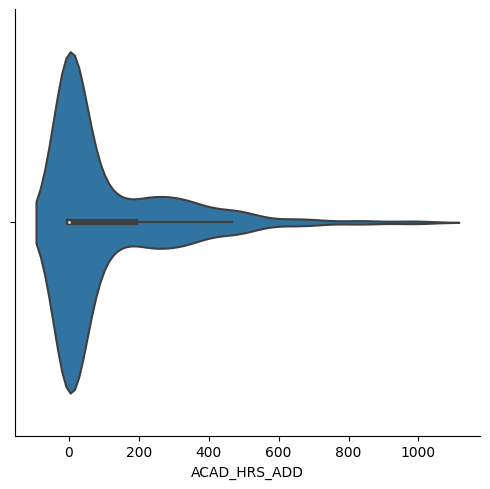

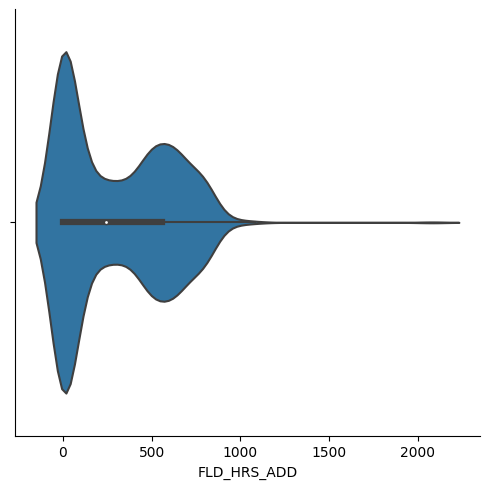

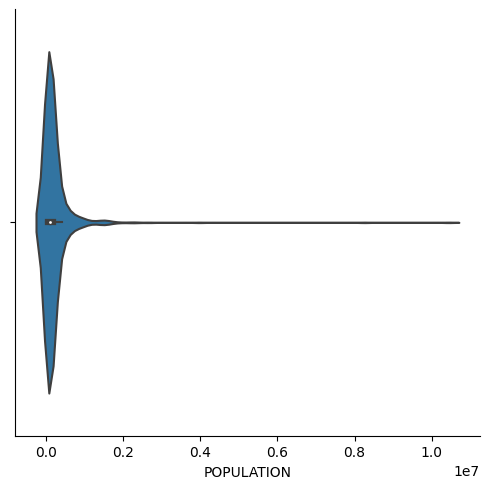

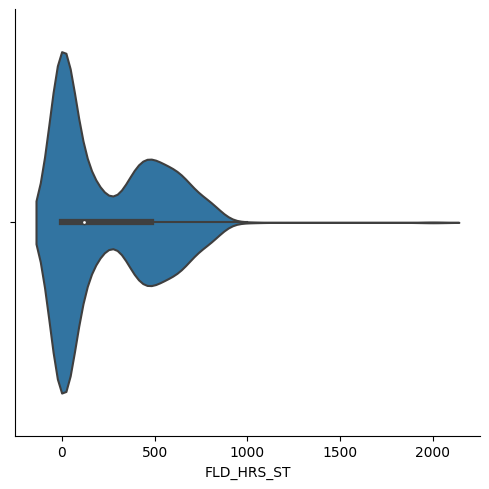

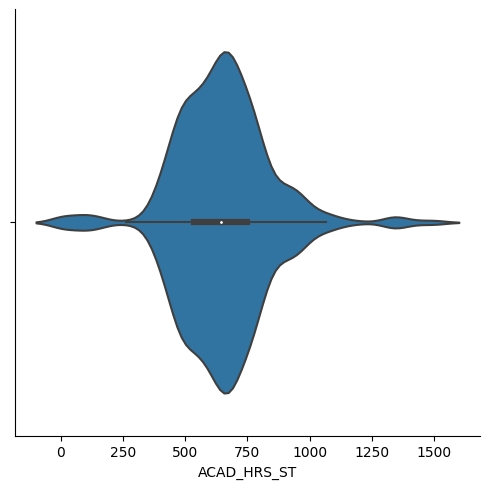

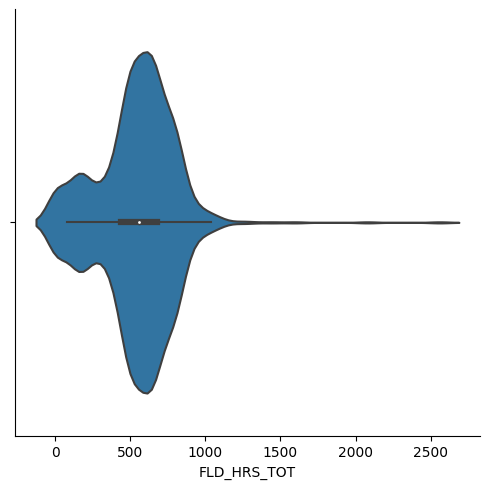

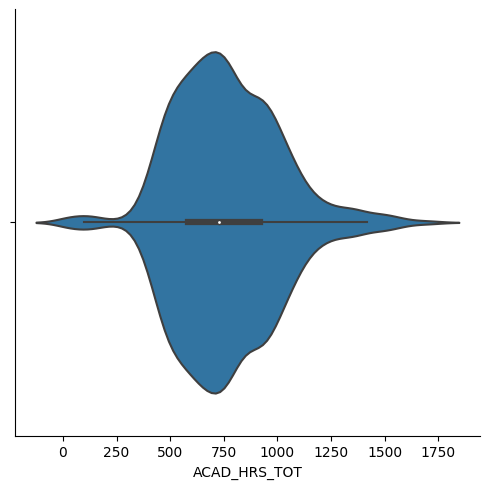

In [ ]:
for col in ultimate_data_set.select_dtypes(include='int').columns:
  fig = sns.catplot(x=col, kind='violin', data=ultimate_data_set)
  plt.show()

ACAD_HRS_ADD is mostly distributed close to 0 but has a very long tail to the right that gets proportionately smaller as it gets closer to 1000. FLD_HRS_ADD has one peak at around 9 and another peak with many data point at around 600, which is quite interesting. It does not really have a tail after it flattens to 1000. FLD_HRS_ST is contributed similar to FLD_HRS_ADD, which makes sense considering that it is partially made up of it. ACAD_HRS_ST has the bulk of data points in the rang of 250 to 1000, which the peak at aroun 700. The number of data points goes up quite quickly and also drops again quite quickly. FLD_HRS_TOT has the bulk of its datapoints at around 600 with another bump at close to 0. ACAD_HRS_TOT basically has the same distribution as ACAD_HRS_ST. 

## Dealing with Outliers
- shootings_per_100k: small towns have really large shootings per 100k, which is misleading. We decided to deal with this by dropping towns with a population < 2000.

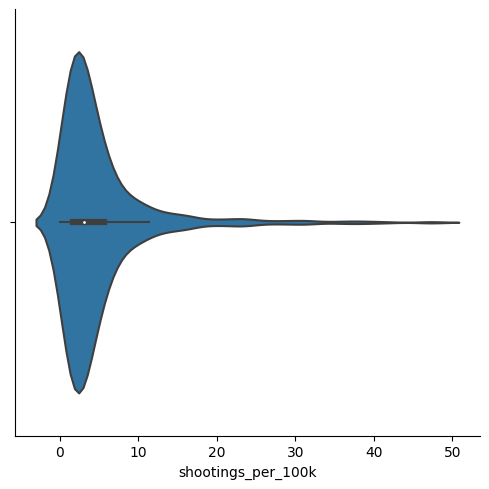

In [ ]:
ultimate_data_set_without_small_population = ultimate_data_set[ultimate_data_set['POPULATION']>=2000]

fig = sns.catplot(x='shootings_per_100k', kind='violin', data=ultimate_data_set_without_small_population)
plt.show()

## Density Plots 

Our outcome variable and main predictors are:
- ACAD_HRS_TOT
- FLD_HRS_TOT
- budget_per_100k
- POPULATION

<Axes: xlabel='ACAD_HRS_TOT', ylabel='Density'>

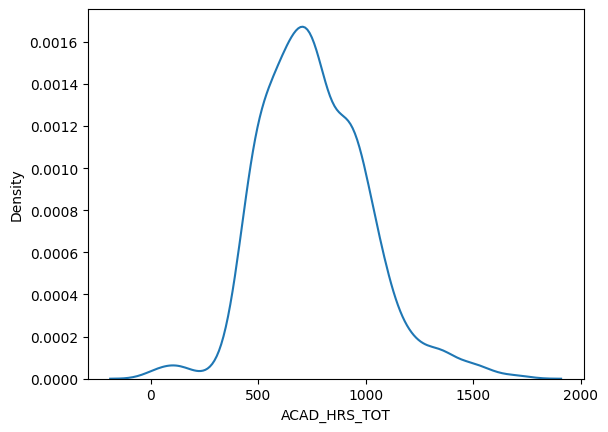

In [ ]:
sns.kdeplot(data=ultimate_data_set_without_small_population, x="ACAD_HRS_TOT")

<Axes: xlabel='FLD_HRS_TOT', ylabel='Density'>

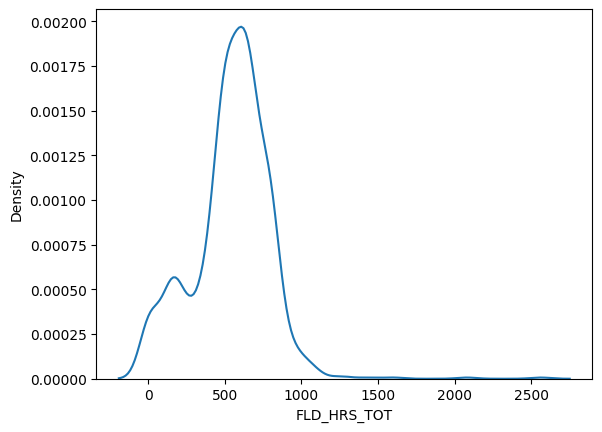

In [ ]:
sns.kdeplot(data=ultimate_data_set_without_small_population, x="FLD_HRS_TOT")

In [ ]:
ultimate_data_set_without_small_population['budget_per_100k'].mean()

32771518.248684324

<Axes: xlabel='budget_per_100k', ylabel='Density'>

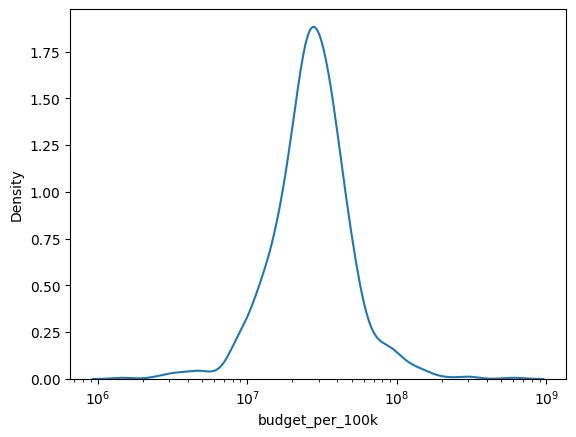

In [ ]:
sns.kdeplot(data=ultimate_data_set_without_small_population, x="budget_per_100k", log_scale=True)

In [ ]:
ultimate_data_set_without_small_population['POPULATION'].mean()

202410.50158730158

<Axes: xlabel='POPULATION', ylabel='Density'>

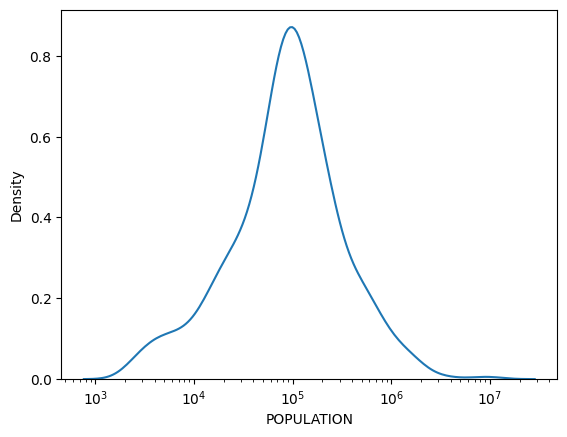

In [ ]:
sns.kdeplot(data=ultimate_data_set_without_small_population, x="POPULATION", log_scale=True)

## Observations of Density Plots

Interestingly, our academy hours and field hours density plots look very similar, each centering around 650. However, while the density curve for field hours dies off before 1000 hours, academy hours don't flatten out until past 1500 hours. This means on average, there tends to be more academy hours than field hours. Academy hours has a larger range than field hours, excluding outliers. 

The budget per 100k and population density plots have a normal distribution. However, the range for both of these variables are very large, meaning we have a lot of variation in population size and budgets within our data. 

In [ ]:
data = ultimate_data_set_without_small_population
data_2 = ultimate_data_set

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 945 entries, 0 to 1237
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ACAD_HRS_ADD        945 non-null    int64  
 1   FLD_HRS_ADD         945 non-null    int64  
 2   POPULATION          945 non-null    int64  
 3   shootings_per_100k  945 non-null    float64
 4   budget_per_100k     945 non-null    float64
 5   FLD_HRS_ST          945 non-null    int64  
 6   ACAD_HRS_ST         945 non-null    int64  
 7   FLD_HRS_TOT         945 non-null    int64  
 8   OPBUDGET_2019       945 non-null    float64
 9   ACAD_HRS_TOT        945 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 81.2 KB


In [ ]:
data = data[["ACAD_HRS_ADD", "FLD_HRS_ADD", "POPULATION", "shootings_per_100k", "budget_per_100k", "FLD_HRS_ST", "ACAD_HRS_ST", "FLD_HRS_TOT", "ACAD_HRS_TOT"]]
data

,ACAD_HRS_ADD,FLD_HRS_ADD,POPULATION,shootings_per_100k,budget_per_100k,FLD_HRS_ST,ACAD_HRS_ST,FLD_HRS_TOT,ACAD_HRS_TOT
0,0,360,25000,4.000000,8.000000e+06,0,480,360,480
1,0,44,16827,5.942830,4.041007e+07,528,720,572,720
2,372,560,124407,2.411440,2.440544e+07,0,728,560,1100
4,110,0,97633,12.290926,3.289957e+07,24,746,24,856
6,0,0,172295,3.482399,9.238718e+06,480,480,480,480
...,...,...,...,...,...,...,...,...,...
1232,0,630,42844,4.668098,4.292412e+07,50,640,680,640
1233,0,0,200040,0.499900,5.263783e+07,160,700,160,700
1234,0,800,165000,1.212121,2.227861e+07,0,480,800,480
1235,0,640,43907,2.277541,4.864249e+07,160,919,800,919


# Explanation of models and reasons for using them

As described in our last assignment, we aim to research whether training and funding has an impact on police brutality. We will use academy training hours as well as field training in order to assess the training. Additionally, the academy and field training is further divided into state enforced hours for new sworn officers, volunatry added hours by the specific department, and the combined of both. Police brutality is assessed in shootigns per 100k. The budget is also adjusted for 100k. 

# Modeling and Modeling Results

In [ ]:
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [ ]:
y = data["shootings_per_100k"]
X = data[["budget_per_100k", "ACAD_HRS_ADD", "FLD_HRS_ADD", "FLD_HRS_ST", "ACAD_HRS_ST"]]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size=0.75, test_size=0.25)



We removed the total hours because they are collinear with the other hours since they are directly made up of them.

### OLS

In [ ]:

# OLS
# create a model
lin_reg = LinearRegression(fit_intercept=True)

# fit the model
lin_model = lin_reg.fit(X_train, y_train)


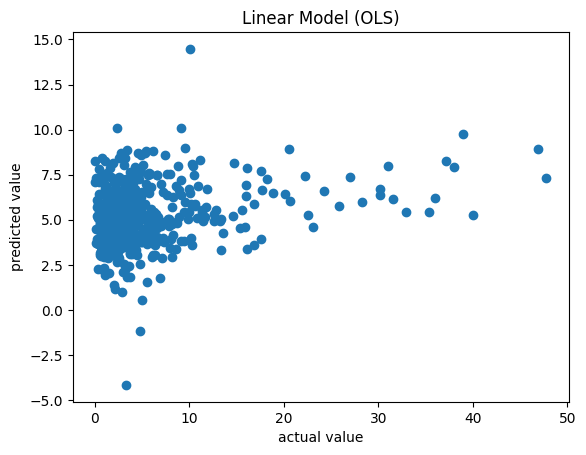

In [ ]:

lin_pred = lin_model.predict(X_train)

plt.scatter(y_train, lin_pred)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
import statsmodels.api as sm


#add constant to predictor variables
x = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     shootings_per_100k   R-squared (uncentered):                   0.344
Model:                            OLS   Adj. R-squared (uncentered):              0.338
Method:                 Least Squares   F-statistic:                              58.82
Date:                Wed, 10 May 2023   Prob (F-statistic):                    3.17e-49
Time:                        01:12:57   Log-Likelihood:                         -1885.6
No. Observations:                 567   AIC:                                      3781.
Df Residuals:                     562   BIC:                                      3803.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
rmse(lin_pred, y_train)

6.294152457494182

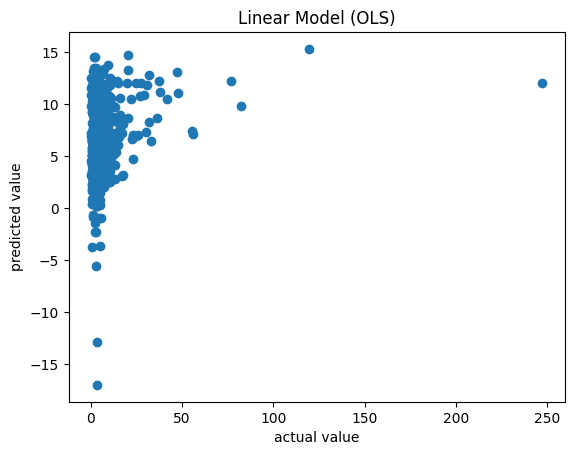

In [ ]:
# Comparing this to the dataset that does not remove small counties

data_2 = data_2[["ACAD_HRS_ADD", "FLD_HRS_ADD", "POPULATION", "shootings_per_100k", "budget_per_100k", "FLD_HRS_ST", "ACAD_HRS_ST", "FLD_HRS_TOT", "ACAD_HRS_TOT"]]
y_2 = data_2["shootings_per_100k"]
X_2 = data_2[["budget_per_100k", "ACAD_HRS_ADD", "FLD_HRS_ADD", "FLD_HRS_ST", "ACAD_HRS_ST"]]


X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size=0.80, test_size=0.20)
X_train_2, X_validate_2, y_train_2, y_validate_2 = train_test_split(X_train_2, y_train_2, train_size=0.75, test_size=0.25)
lin_model_2 = lin_reg.fit(X_train_2, y_train_2)
lin_pred_2 = lin_model_2.predict(X_train_2)

plt.scatter(y_train_2, lin_pred_2)
plt.title('Linear Model (OLS)')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
x_2 = sm.add_constant(X_train_2)

#fit linear regression model
model_2 = sm.OLS(y_train_2, X_train_2).fit()

#view model summary
print(model_2.summary())

                                 OLS Regression Results                                
Dep. Variable:     shootings_per_100k   R-squared (uncentered):                   0.163
Model:                            OLS   Adj. R-squared (uncentered):              0.156
Method:                 Least Squares   F-statistic:                              22.05
Date:                Wed, 10 May 2023   Prob (F-statistic):                    3.26e-20
Time:                        01:12:58   Log-Likelihood:                         -2310.8
No. Observations:                 570   AIC:                                      4632.
Df Residuals:                     565   BIC:                                      4653.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [ ]:
rmse(lin_pred_2, y_train_2)

13.529456342477426

The model that includes the small counties that we removed earlier for the main regression is significantly more inaccurate than the main rergession. Hence, we will not futher investigate this verison of the dataset.



In [ ]:
ridge_reg = Ridge(fit_intercept=True) 
ridge_model = ridge_reg.fit(X_train, y_train)

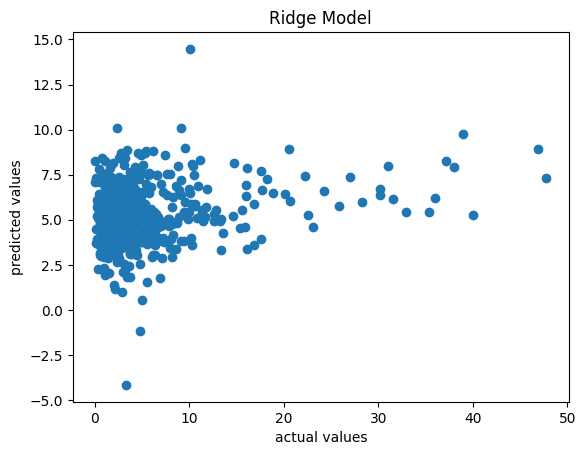

In [ ]:
ridge_pred = ridge_model.predict(X_train)
plt.scatter(y_train, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
rmse(ridge_pred, y_train)

6.294152457494183

## LASSO

In [ ]:
lasso_reg = Lasso(max_iter=10000, fit_intercept=True)  

lasso_model = lasso_reg.fit(X_train, y_train)

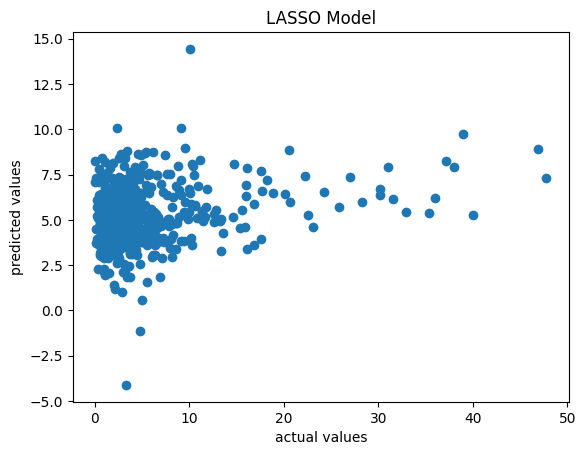

In [ ]:
lasso_pred = lasso_model.predict(X_train)
plt.scatter(y_train, lasso_pred)
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [ ]:
rmse(lasso_pred, y_train)

6.294161901867608

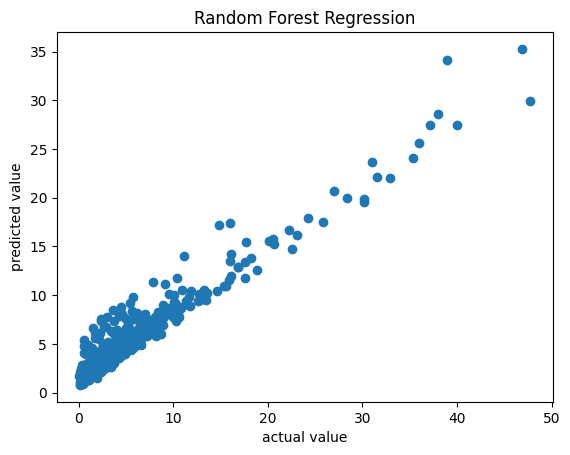

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=None)

rf_model = rf_reg.fit(X_train, y_train)

rf_pred = rf_model.predict(X_train)

plt.scatter(y_train, rf_pred)
plt.title('Random Forest Regression')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
rmse(rf_pred, y_train)

2.4441396780279665

In [ ]:
#Tuning the Random Forest Model to make it more accurate

param_grid = { 'n_estimators': [100, 200, 300],'max_depth': [5, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rf_reg, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.025475020022895634


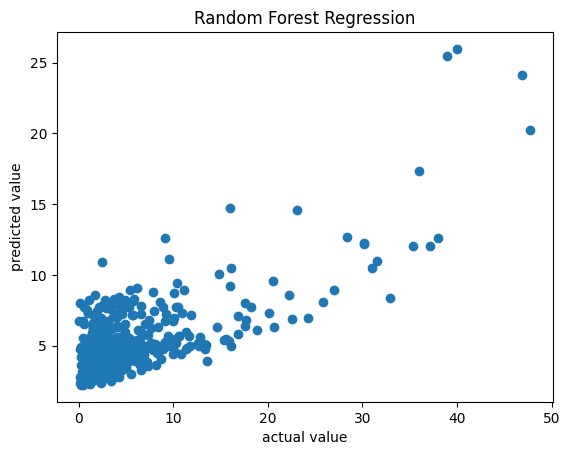

In [ ]:
#Creating another Random Forest model with these hyperparameters

new_rf_reg = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=2, min_samples_leaf=1)

new_rf_model = new_rf_reg.fit(X_train, y_train)

rf2_pred = new_rf_model.predict(X_train)

plt.scatter(y_train, rf2_pred)
plt.title('Random Forest Regression')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

In [ ]:
rmse(rf2_pred, y_train)

4.9457428403610075

## Using Validation to Choose a Model

In [ ]:
lin_vpred = lin_model.predict(X_validate)
ridge_vpred = ridge_model.predict(X_validate)
lasso_vpred = lasso_model.predict(X_validate)
rf_vpred = rf_model.predict(X_validate)
rf_2_vpred = new_rf_model.predict(X_validate)
print("linear model rmse: ", rmse(lin_vpred, y_validate))
print("Ridge rmse: ", rmse(ridge_vpred, y_validate))
print("LASSO rmse: ", rmse(lasso_vpred, y_validate))
print("Random Forest rmse: ", rmse(rf_vpred, y_validate))
print("Tuned Random Forest rmse: ", rmse(rf_2_vpred, y_validate))

linear model rmse:  4.912999601197784
Ridge rmse:  4.302662523483113
LASSO rmse:  4.909810604226487
Random Forest rmse:  5.530568532224224
Tuned Random Forest rmse:  4.761470257324696


We will chose the linear model for the predictions. Although it does not yield the most accurate results out of these options, we believe that the ability to check the p-value of the predictors and the small computing capabilities needed outweight the minor disadvantage in rmse. 

## Predictions

In [ ]:
lin_final_pred = lin_model.predict(X_test)
print('Linear model rmse: ', rmse(lin_final_pred, y_test))

NameError: ignored

In [ ]:
import statsmodels.api as sm
X_addC = sm.add_constant(X)
res = sm.OLS(lin_final_pred, X_test).fit()

print("OLS R-Squared: ",res.rsquared)

OLS R-Squared:  0.7646291325629717


In [ ]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              119.5
Date:                Wed, 10 May 2023   Prob (F-statistic):                    7.23e-56
Time:                        01:41:57   Log-Likelihood:                         -496.85
No. Observations:                 189   AIC:                                      1004.
Df Residuals:                     184   BIC:                                      1020.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
budget_per_100k  4.344e-08   8.52e-09      5.100      0.000    2.66e-08    6.03e-08
ACAD_HRS_ADD       -0.0008      0.001     -0.597      0.551      -0.003       0.002
FLD_HRS_ADD        -0.0073      0.001     -7.584      0.000      -0.009      -0.005
FLD_HRS_ST         -0.0069      0.001     -6.046      0.000      -0.009      -0.005
ACAD_HRS_ST         0.0113      0.001     14.591      0.000       0.010       0.013
==============================================================================
Omnibus:                       14.396   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.255
Skew:                          -0.356   Prob(JB):                     1.21e-06
Kurtosis:                       4.718   Cond. No.                     2.73e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretation:

Our measure of fit (R-Squared) is fairly high, suggesting that there is a high correlation between shootings per 100k and budget and training hours. 


We are particualrly interested in the correlation coefficients for each variable. Budget seems to have a very small positive correlation, meaning having higher budgets can increase the number of shootings per 100k by 3.262e-08. 

Training hours seem to have a varying effect. Additional hours (training and academy) have a negative correlation coefficient, signaling that more hours tend to decrease the amount fo shootings. State enforced hours have positive coefficients, which signal that higher state enforced hours for sworn officers may increase the number of shootings. 


# Modeling Result Explanations


The findings of our study shed light on the complex relationship between police shootings and certain resources, specifically higher budgets and more training hours. Our research indicates that having additional hours of training, whether through field training or academy training, may have a positive impact on reducing the number of police shootings. This suggests that investing in more comprehensive training programs for law enforcement officers could potentially help mitigate the incidence of these violent encounters.

However, the relationship between police budgets and shootings is more nuanced than initially expected. Contrary to our initial assumptions, we found that higher budgets may actually contribute to more shootings. While this result was unexpected, it suggests that the relationship between resources and police shootings is multifaceted and may not be as straightforward as previously thought.

It is important to note that our findings are based on a complex model that takes into account a multitude of variables and factors that may impact police shootings. As such, it may be difficult to generalize our results and draw concrete conclusions about the relationship between police shootings and resources such as training and budgets. The complexities of this topic indicate that more research and analysis is needed to fully understand the underlying factors that contribute to police shootings and how they can be addressed.

# Conclusion 

We aimed to answer the question of whether increases in training and the budget can reduce police brutality. We measured training by state required as well as voluntarily added field training and academy training hours. In theory, the more a police officer is educated, the better they should be able to deal with high stress situations. Less overwhelmed police officers, in turn, should theoratically respond more calculated and, hence, engage in less violence. While we expected state mandated hours to have some effect, we expected added hours to have an even larger effect since these vary more among different police departments. We mainly included the budget because we thought that we needed to control for it. We measured police brutality by killings per 100k population and the budget as budget per 100k population. After collecting and merging the data, we conducted eploratory data analysis to get a better understanding and to remove outliers. Thereafter, we designed multiple regression models, which delivered similar results. Although all variables except for added academy hours turned out to be statistically significant, all predictors turned out to have very small coefficients. Additionally, the very small size of the coefficients imply that training only has very minuscule effects on police brutality as we measured it. For context, the mean shootings per 100k are 6. So it would take roughly 600 more state mandated academy hours (which has the highest magnitude of coefficient) to decrease the mean shootings to 5 per 100k. Hence, we conclude that training hours does not have an impact on police brutality. We think that this might be the case because although training can teach people certain skills, it does not change people fundamentally. So people that might have a tendency to act ferocious will still act so and not lose this fundamental characteristic through training. Added academy hours appear to be the least relevant as it his not statistically significant and since it has the lowest coefficient (outside of budget per capita). All field training hours as well as the state mandated hours have comparatively (to the budget per capita and the added academy hours) large coefficients. That field training hours have more of an effect makes sense since shootings would also happen in a physical interaction scenario and not in an office scenario. These results imply that if one were to increase training hours, it would mke most sense to increase all state mandated hours and added field training hours. The budget per capita has an even smaller (and positive) coefficient. Hence, we conclde that this also has no effect on police brutality. Intuitively, more money might mean that these police officers are better equipped. Better equipment, however, does not make one less brutal. 